[//]: # (Note: this file is used to generate the documnentation for the Fiatlight project.)


Gui Registry & Custom Types
============================

`fiatlight.fiat_togui` is the central module that is able to associate a GUI with a type.

It uses sophisticated mechanisms to inspect the type of function parameters and return values.

It handles a registry of types and their associated GUIs, to which you can add your own types, by calling`
fiatlight.register_type(DataType, DataTypeWithGui)`, where `DataType` is the type you want to register, and `DataTypeWithGui` is the class that will handle the GUI for this type.

`DataTypeWithGui` must inherit from `AnyDataWithGui` and implement the necessary callbacks.

Explore the registry
=====================

The `fiatlight` command line utility is a powerful tool that allows you to explore the available widgets and types in Fiatlight. It can be used to list the available types, to print the GUI info for a given type, and to run a GUI demo for a given type.

Here is the help message for the `fiatlight` command line utility:

In [1]:
%%bash
fiatlight --help

INFO: Showing help with the command 'fiatlight -- --help'.

NAME
    fiatlight

SYNOPSIS
    fiatlight COMMAND

COMMANDS
    COMMAND is one of the following:

     types
       List registered types, with a possible query to filter them. Add an optional query to filter the types.

     gui
       Print the GUI info for a given type. Add the GUI type name as an argument (if not provided, all Gui widgets names are printed)


See the page [Tutorials/fiatlight command line utility](tutorials_cli.ipynb) for more information.

Primitive types
================

The primitive types `int`, `float`, `str`, `bool` are registered by default.

Basic example
-------------

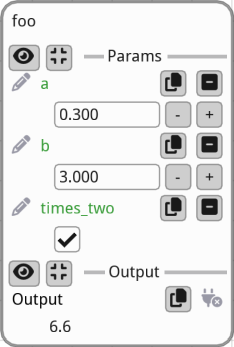

In [4]:
import fiatlight as fl
def foo(a: float, b: float = 3.0, times_two: bool = False) -> float:
    return (a + b) * (2 if times_two else 1)

# Run an app that displays the GUI for the function
# where the user can input the values of the parameters
# (or use the default values)
fl.run(foo, app_name="Primitive Basic")

Example with custom GUI options
-------------------------------

The GUI of primitive is extensively configurable via custom attributes.

See [FunctionWithGui](function_with_gui) for a comprehensive list of all the available attributes (in the "Customizing parameters GUI" section).

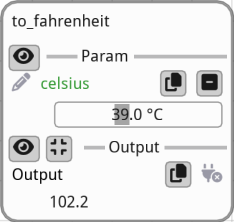

In [5]:
import fiatlight as fl


@fl.with_fiat_attributes(celsius__range=(0, 100), celsius__format="%.1f °C")
def to_fahrenheit(celsius: float) -> float:
    return celsius * 9 / 5 + 32


fl.run(to_fahrenheit, app_name="Primitive Custom")

Range limited numeric types
----------------------------

As a convenience, Fiatlight includes those predefined types for which the GUI will take into account their boundings.

In [6]:
from typing import NewType

# Float types with specific ranges (bounds included)
Float_0_1 = NewType("Float_0_1", float)  # 0 to 1
Float_0_2 = NewType("Float_0_2", float)  # 0 to 1
Float_0_3 = NewType("Float_0_3", float)  # 0 to 1
Float__1_1 = NewType("Float__1_1", float)  # -1 to 1
Float_0_10 = NewType("Float_0_10", float)  # 0 to 10
Float_0_100 = NewType("Float_0_100", float)  # 0 to 100
Float_0_1000 = NewType("Float_0_1000", float)  # 0 to 1000
Float_0_10000 = NewType("Float_0_10000", float)  # 0 to 10000
PositiveFloat = NewType("PositiveFloat", float)  # Any positive float ( strictly greater than 0)

# Int types with specific ranges (bounds included)
Int_0_10 = NewType("Int_0_10", int)  # 0 to 10
Int_0_255 = NewType("Int_0_255", int)  # 0 to 255
Int_0_100 = NewType("Int_0_100", int)  # 0 to 100
Int_0_1000 = NewType("Int_0_1000", int)  # 0 to 100
Int_0_10000 = NewType("Int_0_10000", int)  # 0 to 100

File name types
===============

Several file types names are registered by default. They are synonyms for `str` and are used to specify file paths.
They will be presented with a file dialog in the GUI.

In [7]:
from fiatlight.fiat_doc import look_at_code
%look_at_python_code fiatlight.fiat_types.file_types

from typing import NewType


# FilePath is a synonym of str, but when used as a function parameter,
# it will be displayed as a widget where you can select a file.
FilePath = NewType("FilePath", str)
FilePath.__doc__ = "synonym for str, describing a file path (NewType)"
# FilePath_Save is a synonym of str, but when used as a function parameter,
# it will be displayed as a widget where you can select a file to save to.
FilePath_Save = NewType("FilePath_Save", str)
FilePath_Save.__doc__ = "synonym for str, describing a file path for saving (NewType)"

# With ImagePath, you can select an image file.
ImagePath = NewType("ImagePath", FilePath)
ImagePath.__doc__ = "synonym for str, describing an image file path (NewType)"
ImagePath_Save = NewType("ImagePath_Save", FilePath_Save)
ImagePath_Save.__doc__ = "synonym for str, describing an image file path for saving (NewType)"

# With TextPath, you can select a text file.
TextPath = NewType("TextPath", FilePath)
TextPath.__doc__ = "synonym for str, describing a text file path (NewType)"
TextPath_Save = NewType("TextPath_Save", FilePath_Save)
TextPath_Save.__doc__ = "synonym for str, describing a text file path for saving (NewType)"

# With AudioPath, you can select an audio file.
AudioPath = NewType("AudioPath", FilePath)
AudioPath.__doc__ = "synonym for str, describing an audio file path (NewType)"
AudioPath_Save = NewType("AudioPath_Save", FilePath_Save)
AudioPath_Save.__doc__ = "synonym for str, describing an audio file path for saving (NewType)"

# With VideoPath, you can select a video file.
VideoPath = NewType("VideoPath", FilePath)
VideoPath.__doc__ = "synonym for str, describing a video file path (NewType)"
VideoPath_Save = NewType("VideoPath_Save", FilePath_Save)
VideoPath_Save.__doc__ = "synonym for str, describing a video file path for saving (NewType)"

*Example: a pipeline that lets the user select a text file and saves it into another file in lowercase*

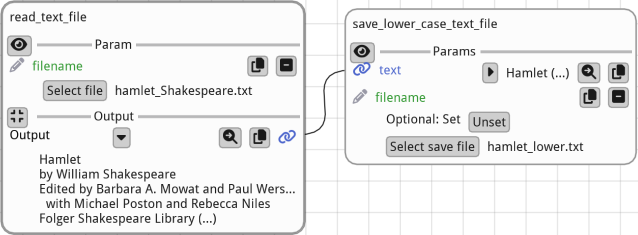

In [14]:
import fiatlight as fl
from fiatlight.fiat_types import TextPath, TextPath_Save

def read_text_file(filename: TextPath) -> str:
    with open(filename) as  f:
        return f.read()

def save_lower_case_text_file(text: str, filename: TextPath_Save | None = None) -> None:
    # Note: since the filename is optional, the user can choose to not save the file
    if filename is None:
        return
    with open(filename, "w") as f:
        f.write(text.lower())

fl.run([read_text_file, save_lower_case_text_file], app_name="Read and Save Text File")

Color types
===========

Several color types are registered by default.

In [9]:
%look_at_python_code fiatlight.fiat_types.color_types

from typing import NewType

ColorRgb = NewType("ColorRgb", tuple[int, int, int])
ColorRgb.__doc__ = "synonym for tuple[int, int, int] describing an RGB color, with values in [0, 255] (NewType)"

ColorRgba = NewType("ColorRgba", tuple[int, int, int, int])
ColorRgba.__doc__ = "synonym for tuple[int, int, int, int] describing an RGBA color, with values in [0, 255] (NewType)"

ColorRgbFloat = NewType("ColorRgbFloat", tuple[float, float, float])
ColorRgbFloat.__doc__ = (
    "synonym for tuple[float, float, float] describing an RGB color, with values in [0, 1] (NewType)"
)

ColorRgbaFloat = NewType("ColorRgbaFloat", tuple[float, float, float, float])
ColorRgbaFloat.__doc__ = (
    "synonym for tuple[float, float, float, float] describing an RGBA color, with values in [0, 1] (NewType)"
)


def _int255_to_float(value: int) -> float:
    return value / 255.0


def _float_to_int255(value: float) -> int:
    return int(value * 255)


def color_rgb_to_color_rgb_float(color_rgb: ColorRgb) -> ColorRgbFloat:
    return ColorRgbFloat(tuple(_int255_to_float(value) for value in color_rgb))  # type: ignore


def color_rgba_to_color_rgba_float(color_rgba: ColorRgba) -> ColorRgbaFloat:
    return ColorRgbaFloat(tuple(_int255_to_float(value) for value in color_rgba))  # type: ignore


def color_rgb_float_to_color_rgb(color_rgb_float: ColorRgbFloat) -> ColorRgb:
    return ColorRgb(tuple(_float_to_int255(value) for value in color_rgb_float))  # type: ignore


def color_rgba_float_to_color_rgba(color_rgba_float: ColorRgbaFloat) -> ColorRgba:
    return ColorRgba(tuple(_float_to_int255(value) for value in color_rgba_float))  # type: ignore


def color_rgb_to_color_rgba(color_rgb: ColorRgb) -> ColorRgba:
    return ColorRgba(color_rgb + (255,))


def color_rgb_float_to_color_rgba_float(color_rgb_float: ColorRgbFloat) -> ColorRgbaFloat:
    return ColorRgbaFloat(color_rgb_float + (1.0,))

*Example: using color types in function*

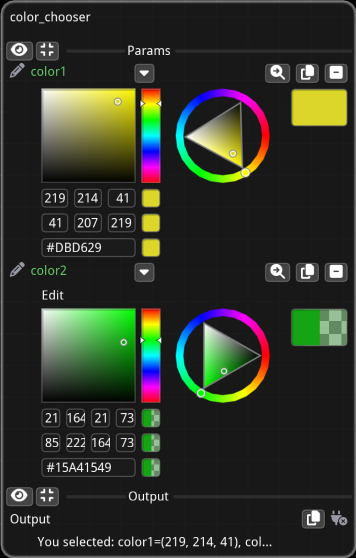

In [10]:
import fiatlight as fl
from fiatlight.fiat_types import ColorRgb, ColorRgba

def color_chooser(color1: ColorRgb, color2: ColorRgba) -> str:
    return f"You selected: {color1=}, {color2=}"

fl.run(color_chooser, app_name="Color Chooser")

Optional types
==============

If a type is registered, its optional version is also registered.

*Example: using an optional color in a function*

(In this example, the user needs to click on "Set" to set a value to the optional color)

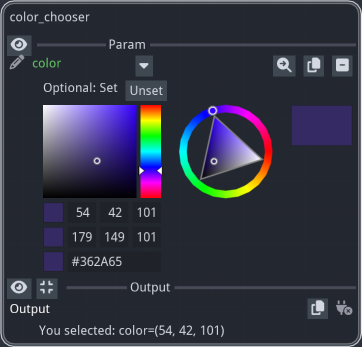

In [11]:
import fiatlight as fl
from fiatlight.fiat_types import ColorRgb, ColorRgba

def color_chooser(color: ColorRgb | None = None) -> str:
    return f"You selected: {color=}"

fl.run(color_chooser, app_name="Optional Color")

Lists
=====

A very basic support is provided for lists. It does not allow to edit the values.
However, it can present a list of values using (all of them will be rendered as string using str() function).

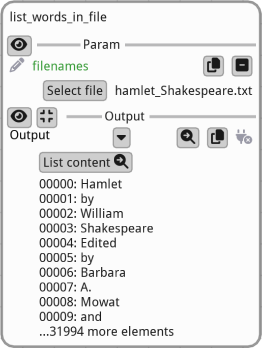

In [15]:
import fiatlight as fl
from fiatlight.fiat_types import TextPath

def list_words_in_file(filenames: TextPath) -> list[str]:
    with open(filenames) as f:
        return f.read().split()

fl.run(list_words_in_file, app_name="List Words in File")

Enum classes
============

Enum classes are automatically associated to a GUI.

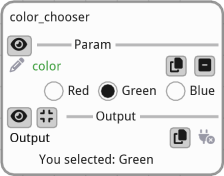

In [16]:
import fiatlight as fl
from enum import Enum

class Color(Enum):
    Red = 1
    Green = 2
    Blue = 3

def color_chooser(color: Color) -> str:
    return f"You selected: {color.name}"

fl.run(color_chooser, app_name="Enum Color")

Dataclasses
===========

Dataclasses can easily be registered with their GUI.

*Note: Fiatlight is unable to auto-generate a serialization/deserialization mechanism for dataclasses.
If you need this, it is advised to use Pydantic models instead.*


*Example: using a dataclass in a function*

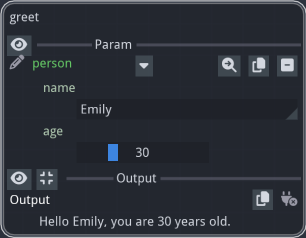

In [17]:
import fiatlight as fl
from dataclasses import dataclass

# Using a decorator to register the dataclass with its GUI
@fl.dataclass_with_gui_registration(age__range=(0, 120))
class Person:
    name: str
    age: int

# Note: it is also possible to register the dataclass with the commented line below
#    fl.register_dataclass(Person)

def greet(person: Person) -> str:
    return f"Hello {person.name}, you are {person.age} years old."

# Note: this app *will not* remember the values of the dataclass fields between runs
fl.run(greet, app_name="Dataclass Person")

Pydantic models
===============

Pydantic models can easily be registered with their GUI.

*Notes:*
- *fiatlight will automatically generate a serialization/deserialization mechanism for Pydantic models, so that user entries can be saved and reloaded.*
- *models can be nested: in the example below, you will see 3 levels of nesting, and fiatlight will generate a nice GUI for those nestings.*


*Example: using a Pydantic model in a function*

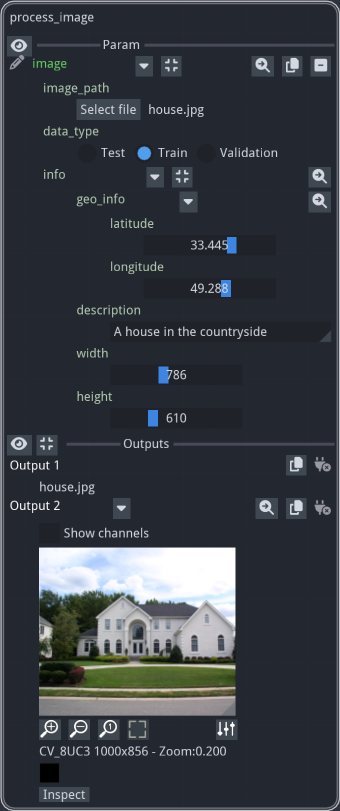

In [18]:
import fiatlight as fl
from enum import Enum
from fiatlight.fiat_types import ImagePath
from fiatlight.fiat_kits.fiat_image import ImageU8_3
from pydantic import BaseModel
import cv2

# An Enum which will associated to a Gui automatically
class TrainingDataType(Enum):
    Test = "test"
    Train = "train"
    Validation = "validation"


# A Pydantic model with a GUI decorator, and custom attributes for the fields
@fl.base_model_with_gui_registration(latitude__range=(-90, 90), longitude__range=(-180, 180))
class GeographicInfo(BaseModel):
    latitude: float
    longitude: float

# Note: it is also possible to register the Pydantic model with the commented line below
#     fl.register_base_model(GeographicInfo)


# A second model, which nests the first one (GeographicInfo)
@fl.base_model_with_gui_registration(width__range=(0, 2000), height__range=(0, 2000))
class ImageInfo(BaseModel):
    geo_info: GeographicInfo
    description: str
    width: int
    height: int

# A third model, which nests the second one (ImageInfo)
# In total, it has 3 levels: TrainingImage -> ImageInfo -> GeographicInfo
@fl.base_model_with_gui_registration()
class TrainingImage(BaseModel):
    image_path: ImagePath
    data_type: TrainingDataType
    info: ImageInfo

# Our function that uses the Pydantic model:
# we ought to see a nice GUI with 3 levels of nesting
def process_image(image: TrainingImage) -> tuple[str, ImageU8_3]:
    import os
    basename = os.path.basename(image.image_path)
    img = cv2.imread(image.image_path)
    return basename, img

# Note: this app *will* remember the values of the Pydantic model fields between runs
fl.run(process_image, app_name="Pydantic Image Model")

Custom types registration
=========================

By calling `fiatlight.register_type(DataType, DataTypeWithGui)`, it is possible to register a custom type with its GUI.

For a given type's GUI, it is possible to customize many aspects. Basically all the callbacks and options inside [AnyDataGuiCallbacks](any_data_gui_callbacks.ipynb) can be customized.


Example 1: a customizable Normal Distribution type
--------------------------------------------------

**Step 1: Define the Custom Type**

First, let’s define a new type called NormalDistribution.

In [19]:
class NormalDistribution:
    mean: float = 0.0
    stddev: float = 1.0

    def __init__(self, mean: float = 0.0, stddev: float = 1.0) -> None:
        self.mean = mean
        self.stddev = stddev

**Step 2: Create a Class to Handle the Custom Type**

Next, we create a class NormalDistributionWithGui that extends AnyDataWithGui and defines the custom presentation and editing logic for the NormalDistribution type.

It will handle:
- A custom GUI for editing the NormalDistribution type
- A custom GUI for presenting the NormalDistribution type
  (using a cached figure, which is updated when the distribution changes)
- Serialization and deserialization of the custom type
- A default value provider

In [20]:
import fiatlight as fl
from imgui_bundle import imgui, imgui_fig
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np


class NormalDistributionWithGui(fl.AnyDataWithGui[NormalDistribution]):
    # Cached figure for the distribution plot
    figure: Figure | None = None
    # boolean to indicate if the figure image should be refreshed
    shall_refresh_figure_image: bool = True

    def __init__(self) -> None:
        super().__init__(NormalDistribution)

        # Edit and present callbacks
        self.callbacks.edit = self._edit_gui
        self.callbacks.present = self._present_gui
        self.callbacks.present_str = lambda value: f"Normal Distrib: Mean={value.mean:.2f}, StdDev={value.stddev:.2f}"

        # Default value provider
        self.callbacks.default_value_provider = lambda: NormalDistribution()

        # Serialization of the custom type
        # (note it would be automatic if we used a Pydantic model)
        self.callbacks.save_to_dict = lambda value: {"mean": value.mean, "stddev": value.stddev}
        self.callbacks.load_from_dict = lambda data: NormalDistribution(mean=data["mean"], stddev=data["stddev"])

        # Callback for handling changes: we need to subscribe to this event
        # in order to update the self.figure when the distribution changes
        self.callbacks.on_change = self._on_change

    def _on_change(self, value: NormalDistribution) -> None:
        # remember to close the previous figure to avoid memory leaks
        if self.figure is not None:
            plt.close(self.figure)

        # Create the figure
        x = np.linspace(value.mean - 4 * value.stddev, value.mean + 4 * value.stddev, 100)
        y = (1 / (value.stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - value.mean) / value.stddev) ** 2)
        figure = plt.figure(figsize=(4, 3))
        plt.plot(x, y)
        plt.title("Normal Distribution")
        plt.xlabel("x")
        plt.ylabel("Density")
        plt.grid(True)

        # Cache the figure
        self.figure = figure

        # Indicate that the figure image should be refreshed
        self.shall_refresh_figure_image = True

    @staticmethod
    def _edit_gui(value: NormalDistribution) -> tuple[bool, NormalDistribution]:
        # Note: we receive the current value and return a tuple with
        # a boolean indicating if the value was modified
        modified = False
        imgui.text("Edit Normal Distribution:")
        imgui.set_next_item_width(100)
        changed, new_mean = imgui.slider_float("Mean", value.mean, -10.0, 10.0)
        if changed:
            value.mean = new_mean
            modified = True
        imgui.set_next_item_width(100)
        changed, new_stddev = imgui.slider_float("StdDev", value.stddev, 0.1, 10.0)
        if changed:
            value.stddev = new_stddev
            modified = True

        return modified, value

    def _present_gui(self, _value: NormalDistribution) -> None:
        # We do not use the value which was passed as a parameter as we use the cached Figure
        # which was updated in the _on_change callback
        imgui_fig.fig("Normal Distribution", self.figure, refresh_image=self.shall_refresh_figure_image)
        self.shall_refresh = False

**Step 3: Register the type**

Finally, we register the custom type with its GUI, simply by calling the register_type function.

In [21]:
fl.register_type(NormalDistribution, NormalDistributionWithGui)

From now on, the NormalDistribution type will be associated with the NormalDistributionWithGui GUI:
any function that uses NormalDistribution as a parameter or as a return type will automatically have a GUI for editing and presenting the NormalDistribution type.

**Step 4: Use the custom type in a function**

In this example, our function simply returns the NormalDistribution instance that was passed to it.
In the screenshot, you can see the "edit" callback in action in the Param edition section, and the "present" callback in the Output section.

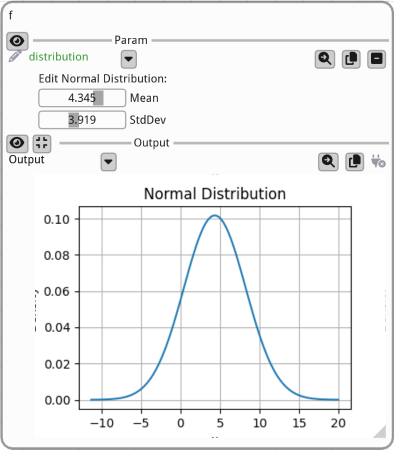

In [22]:
def f(distribution: NormalDistribution) -> NormalDistribution:
    return distribution

fl.run(f, app_name="Normal Distribution")

Example 2: a Length type with imperial units
--------------------------------------------

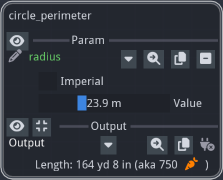

In [23]:
# Step 1: Define the custom type for which we want to create a GUI
# =================================================================
from typing import NewType

Length = NewType("Length", float)

# Step 2: Create a class to handle the custom type
# ================================================
import fiatlight
from fiatlight import AnyDataWithGui
from fiatlight.fiat_widgets import fontawesome_6_ctx, icons_fontawesome_6
from typing import NewType, Any, Dict
from imgui_bundle import imgui, hello_imgui, imgui_ctx, ImVec4


# The specific GUI for our custom type
class LengthWithGui(AnyDataWithGui[Length]):
    use_imperial_units: bool = False

    def __init__(self) -> None:
        super().__init__(Length)
        self.callbacks.edit = self._edit  # A custom callback for editing the data
        self.callbacks.present = self._present  # A custom callback for presenting the data
        self.callbacks.present_str = self._present_str  # A custom callback for presenting the data as a short string
        self.callbacks.default_value_provider = lambda: Length(1.0)  # A custom callback for providing a default value
        # custom callback for saving the GUI options (here, we save the imperial units option)
        self.callbacks.save_gui_options_to_json = self._save_gui_options_to_json
        self.callbacks.load_gui_options_from_json = self._load_gui_options_from_json

    def _edit(self, value: Length) -> tuple[bool, Length]:
        _, self.use_imperial_units = imgui.checkbox("Imperial", self.use_imperial_units)

        format = "%.3g m" if not self.use_imperial_units else "%.3g yd"
        value_unit = value * 1.09361 if self.use_imperial_units else value
        imgui.set_next_item_width(hello_imgui.em_size(10))
        changed, new_value_unit = imgui.slider_float(
            "Value", value_unit, 1e-5, 1e11, format, imgui.SliderFlags_.logarithmic.value
        )
        if changed:
            value = Length(new_value_unit / 1.09361 if self.use_imperial_units else new_value_unit)
        return changed, value

    @staticmethod
    def _present_str(value: Length) -> str:
        return f"Length: {value:.2f} m"

    @staticmethod
    def _present(value: Length) -> None:
        with fontawesome_6_ctx():
            yd = int(Length(value * 1.09361))
            inches = int((Length(value * 1.09361 - yd) * 36))
            bananas = int(value / 0.2)
            imgui.text(f"Length: {yd} yd {inches:.0f} in (aka {bananas}")
            imgui.same_line()
            with imgui_ctx.push_style_color(imgui.Col_.text.value, ImVec4(1, 0.5, 0, 1)):
                imgui.text(icons_fontawesome_6.ICON_FA_CARROT)
            imgui.same_line()
            imgui.text(")")

    def _save_gui_options_to_json(self) -> Dict[str, Any]:
        return {"use_imperial_units": self.use_imperial_units}

    def _load_gui_options_from_json(self, json: Dict[str, Any]) -> None:
        self.use_imperial_units = json.get("use_imperial_units", False)


# Step 3: Register the custom type with its GUI
# ==============================================
from fiatlight import register_type

register_type(Length, LengthWithGui)


# Step 4: Use the custom type in a function
# =========================================
# A function that uses our custom type
def circle_perimeter(radius: Length) -> Length:
    return Length(2 * 3.14159 * radius)


# Run the function with the GUI
fiatlight.run(circle_perimeter, app_name="Circle Perimeter in banana units")

Example 3: a sound player
-------------------------

The sound wave player also uses a custom type with a GUI.

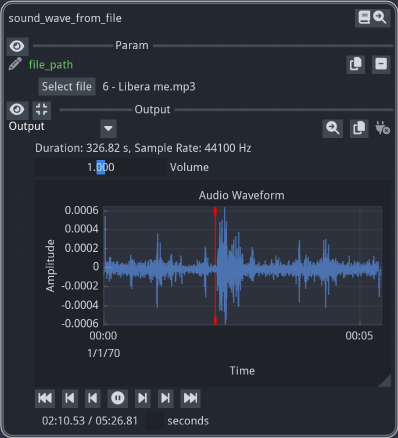

In [24]:
from fiatlight.fiat_kits.experimental.fiat_audio_simple import sound_wave_player_gui_demo
sound_wave_player_gui_demo.main()

For more info, see its [source code](https://github.com/pthom/fiatlight/blob/refact_io/src/python/fiatlight/fiat_kits/experimental/fiat_audio_simple/sound_wave_player_gui.py)).


Full code
=========

Browse the [full code](../fiat_togui) of fiat_togui online.